<a href="https://colab.research.google.com/github/kirinsannnnnnnnnn/image_search_hello_world/blob/master/hello_ramen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import os

In [0]:
from google.colab import drive
drive.mount('./gdrive')

!ls "./gdrive/My Drive/"

In [17]:
!cd gdrive/My\ Drive/ラーメン類似検索/ && git clone https://github.com/K-jun1221/reverse-image-search 
!ls ./gdrive/My\ Drive/ラーメン類似検索/


Cloning into 'reverse-image-search'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11 (delta 2), reused 10 (delta 1), pack-reused 0
Unpacking objects: 100% (11/11), done.
reverse-image-search


In [0]:
!cd ./gdrive/My\ Drive/ラーメン類似検索/reverse-image-search && unzip ramen_images.zip

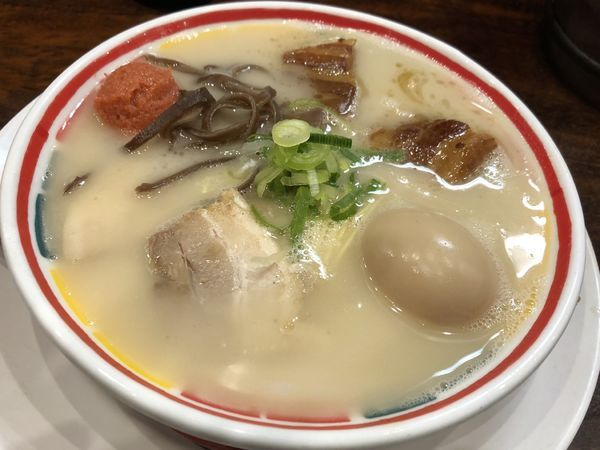

In [28]:
from IPython.display import Image

img_path = "./gdrive/My Drive/ラーメン類似検索/reverse-image-search/ramen_images/ramen1.jpg"
Image(img_path)

In [29]:
from keras.applications.vgg19 import VGG19

base_model = VGG19(weights="imagenet")
base_model.summary()

Using TensorFlow backend.


574717952/574710816 [==============================] - 17s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

In [30]:
print(base_model.input)
print(base_model.output)

Tensor("input_1:0", shape=(?, 224, 224, 3), dtype=float32)
Tensor("predictions/Softmax:0", shape=(?, 1000), dtype=float32)


In [31]:
img_path = "./gdrive/My Drive/Google Colaboratory/ラーメン類似検索/ramen_images/ramen1.jpg"
img = image.load_img(img_path, target_size=(224, 224))
input = image.img_to_array(img)
result = base_model.predict(np.array([input]))
print("配列の中身", result)
print("配列の長さ: ", len(result[0]))

NameError: ignored